## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [35]:
X.isnull().sum().sum() #Видим, что пропущенных значений нет

0

In [36]:
(X.dtypes == "object").values #Тоже видим, что нет типа "object", который характерен для категориальных признаков

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [37]:
from sklearn.model_selection import train_test_split
np.random.seed(33) #зафиксировали 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #разделили выборку на тренирвочную и тестовую
X_train.head(5) #посмотрим, что получилось в тренировочной

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_train1=X_train['alcohol']
X_train1=pd.concat([X_train1, X_train['magnesium']], axis= 1) #сделали новый дф с двумя признаками, с которым дальше будем работать
X_train_scaled=scaler.fit_transform(X_train1) #отмасштабировали эти признаки
X_test1=X_test['alcohol']
X_test1=pd.concat([X_test1, X_test['magnesium']], axis= 1) #сделали то же самое для тестовой
X_test_scaled=scaler.transform(X_test1) 
Data=pd.DataFrame(columns=['NN','Train','Test']) #Создали дф, туда запишем результаты обучения
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform') #классификаторы для количества соседей от 1 до 25, евклидова метрика и равные веса
clf2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
clf3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
clf4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean', weights='uniform')
clf5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='uniform')
clf6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean', weights='uniform')
Classifiers=[clf1,clf2,clf3,clf4,clf5,clf6] #создаем список, чтобы пройтись по выборке и найти долю верных ответов для каждого случая, не переписывая код
for k in Classifiers:
  k.fit(X_train_scaled, y_train) #обучаем
  y_predicted = k.predict(X_train_scaled)
  train=np.mean(y_train == y_predicted) #верные ответы на тренировочной выборке
  y_predicted1 = k.predict(X_test_scaled)
  test=np.mean(y_test == y_predicted1) #на тестовой выборке
  itog=pd.DataFrame([[int(k.n_neighbors),round(train,2),round(test,2)]], columns=['NN','Train','Test']) #создаем дф с итогом
  Data=pd.concat([Data, itog], axis= 0, ignore_index=True) #добавляем его в дф
Data.index=Data['NN']
print(Data.drop(columns='NN'))


    Train  Test
NN             
1    1.00  0.63
3    0.85  0.67
5    0.77  0.69
10   0.79  0.65
15   0.78  0.67
25   0.77  0.57


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend


**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

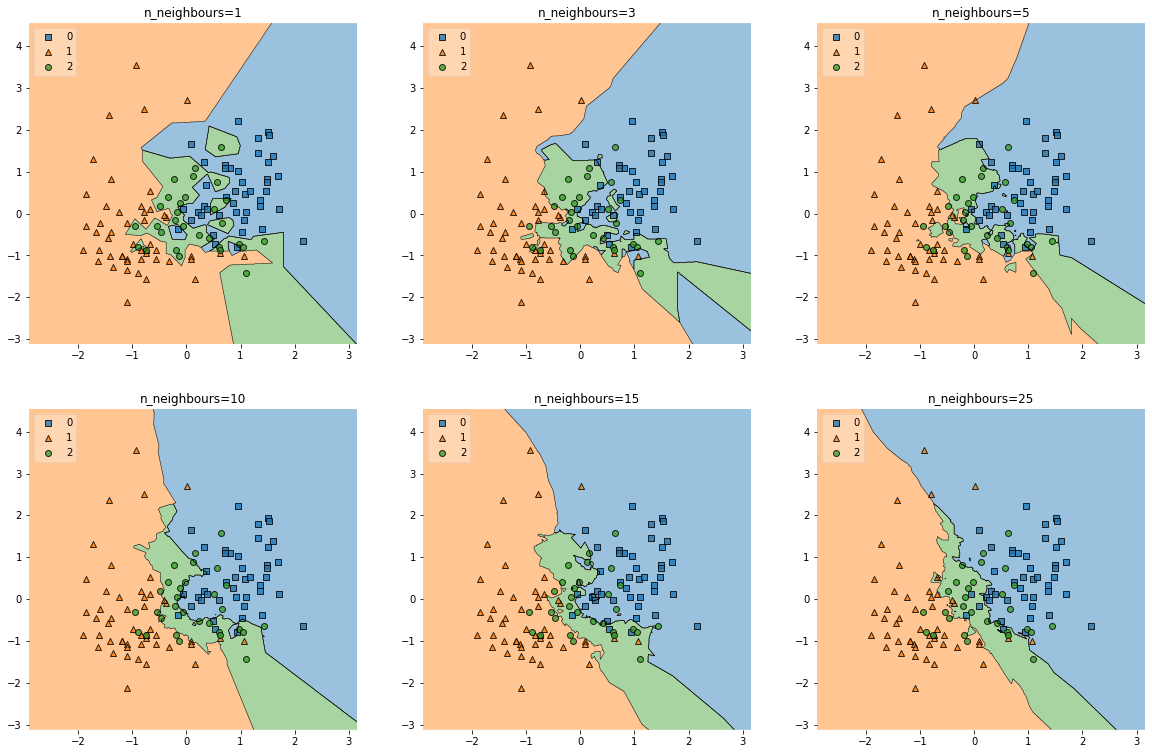

In [10]:

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,13))

labels = ['n_neighbours=1', 'n_neighbours=3', 'n_neighbours=5', 'n_neighbours=10','n_neighbours=15','n_neighbours=25']
for clf, lab, grd in zip(Classifiers,
                         labels,
                         itertools.product([0, 1,2], repeat=2)):

    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [11]:
# Оптимальным кажется использовать либо 5, либо 15 соседей
# Если мы посмотрим на результаты в задании 1.3, то увидим, что k=5 даст наибольшую долю верных ответов на тестовой выборке (0.69)
# Число соседей k=15 даст вторую по величине долю верных ответов на тестовой выборке, равную 0.67
# Я бы предположила, что оптимально брать k=15, хоть и доля верных ответов у него чуть меньше. Если мы посмотрим на задание 1.5, то увидим, что
# при k=5 решающая поверхность для класса объектов зеленого цвета включает в себя пробелы в виде "островков" синего и оранжевого класса внутри него из-за пары объектов,
# попавших в эту область. Это не совсем хорошая решающая поверхность, поскольку в центре все-таки сосредоточены в основном объекты зеленого класса, а из-за некоторых
# объектов других классов модель выделяет под них отдельные поверхности, что не совсем хорошо. Данные имеют не простую геометрическую структуру, то есть
# объекты "накладываются" друг на друга, пересекаются, поэтому использовать малое число соседей кажется неоптимальным. При k=15 границы более четкие, уже не выделяются отдельные
# поверхности (по крайней мере их не очень много) для "выбросов" в данных

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

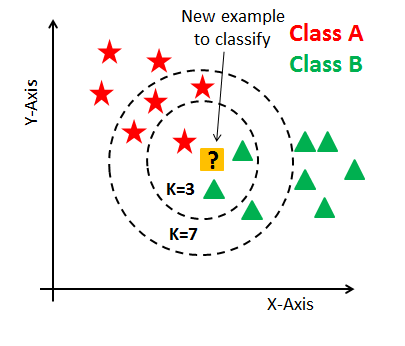

In [40]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.priznak=X.shape[0]#узнали, cколько объектов в обучающей выборке
      self.train_priznak=X 
      self.train_answer=y
      pass
    
    def predict(self, X):
      tester=X
      y_predict=[] #создаем список с предсказаниями
      for m in range (tester.shape[0]): # пройдемся по каждому объекту в тестовой выборке
        Distances=[] # сюда будем записывать расстояния
        for i in range (self.priznak): #вычислим расстояние до каждого объекта в обучающей выборке
          w1_train=self.train_priznak[i][0] #первая координата (признак) тренировчного объетка
          w2_train=self.train_priznak[i][1] #вторая координата
          w1_test=tester[m][0] #первая координата тестового объекта
          w2_test=tester[m][1] #вторая координата
          dist=((w1_train-w1_test)**2+(w2_train-w2_test)**2)**(1/2) #находим расстояние
          Distances+=[[dist,self.train_answer[i]]] #добавляем в список расстояний двухэлементный список: расстояние и ответ-предсказание, ему соответствующее
        Distances=sorted(Distances, key=lambda x: x[0]) #отсортируем элементы по расстоянию
        Metrics=Distances[:self.k] #взяли первых k ближайших соседей после сортировки
        znachenia=[] 
        for t in Metrics:
          znachenia+=[t[1]] #вытаскиваем значения
        cnt = Counter(znachenia) #посчитали, сколько раз встретились эти значения 
        number=list(cnt.values()) #вытаскиваем подсчет значений
        kolvo=list(cnt.keys()) #вытаскиваем предсказания по этим подсчетам
        maxim=max(number) #ищем наиболее встречающееся предстказание
        t=number.index(maxim) #находим его индекс
        y_predict+=[kolvo[t]]#добавляем это предсказание в итоговый список предсказаний

      return(np.array(y_predict))
      pass

In [41]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [42]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [44]:
data.isnull().sum().sum()#пропущенных значений нет

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [47]:
data=data.drop(columns=['Unnamed: 0'])#Unnamed:0 смысла не несет, просто показывает индекс, удалим его
data.head(5) #новый дф без Unnamed

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [48]:
correlations_data = data.corr()
correlations_data #больше всего коррелируют carat и x,y,z (если мы смотрим на корреляцию с price)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [49]:
data_new= pd.get_dummies(data, drop_first=True) 
data_new.head(5)#смотрим, что получилось

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [50]:
y = data_new['price'] #целевая переменная
X=data_new.drop(columns=['price'])#все признаки без целевой
np.random.seed(33) #зафиксировали 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #разделили выборку на тренирвочную и тестовую
X_train.head(5) #для примера посмотрим, что получилось в тренировочной

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
30634,0.34,62.0,56.0,4.46,4.48,2.77,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
17601,1.33,62.7,56.0,6.99,7.04,4.40,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
10590,0.91,62.9,55.0,6.13,6.17,3.87,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53663,0.80,63.7,57.0,5.87,5.90,3.75,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6235,0.90,62.6,58.0,6.10,6.14,3.83,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [51]:
scaler = StandardScaler()
X_train1=X_train[['carat','depth','table','x','y','z']] #вытащили вещественные признаки
X_train2=X_train.drop(columns=['carat','depth','table','x','y','z']) #вытащили все остальные (категориальные)
X_train2=X_train2.reset_index(drop= True)
X_test1=X_test[['carat','depth','table','x','y','z']] #аналогично для тестовой
X_test2=X_test.drop(columns=['carat','depth','table','x','y','z'])
X_test2=X_test2.reset_index(drop= True)
X_train3=scaler.fit_transform(X_train1) #отмасштабировали вещественные признаки
X_test3=scaler.transform(X_test1)
X_train3=pd.DataFrame(X_train3, columns=['carat','depth','table','x','y','z'])
X_test3=pd.DataFrame(X_test3, columns=['carat','depth','table','x','y','z'])
X_train_scaled=pd.concat([X_train3, X_train2], axis= 1) #соединили обратно отмасштабированные вещественные признаки с категориальными в один дф
X_test_scaled=pd.concat([X_test3, X_test2], axis= 1)
X_train_scaled.head(5) #смотрим, что получилось в тренировочной выборке

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.966886,0.174186,-0.653685,-1.134489,-1.088617,-1.082475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.121469,0.662259,-0.653685,1.121742,1.130137,1.210629,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.235500,0.801709,-1.100909,0.354802,0.376108,0.465019,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.003461,1.359507,-0.206460,0.122936,0.142098,0.296201,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.214406,0.592535,0.240764,0.328048,0.350107,0.408746,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) #обучили
print("MSE_train: ", mean_squared_error(y_train, lr.predict(X_train_scaled)))
print("MSE_test: ", mean_squared_error(y_test, lr.predict(X_test_scaled)))

MSE_train:  1261901.7938835185
MSE_test:  1311549.0834539912


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [74]:
koefs=lr.coef_ #достали оценки коэффициентов
koefsdf=pd.DataFrame(koefs) #сделали дф
koefsdf.index=list(X_train_scaled.columns) #достали названия этих коэффициентов
koefsdf.columns=['lr_coefs']
koefsdf #из вещественных переменных carat и x имеют очень большие оценки коэффициентов по модулю, намного превышающие все остальные (из вещественных)

,lr_coefs
carat,5327.880692
depth,-90.760824
table,-57.766906
x,-1123.538778
y,-1.841208
z,-22.859096
cut_Good,565.972935
cut_Ideal,820.112566
cut_Premium,747.882017
cut_Very Good,716.102497


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [60]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10).fit(X_train_scaled, y_train) 
ridge = Ridge(10).fit(X_train_scaled, y_train) #обучили
koefs2=lasso.coef_
koefsdf2=pd.DataFrame(koefs2)#коэффициенты для lasso
koefsdf2.index=list(X_train_scaled.columns)
koefs3=ridge.coef_
koefsdf3=pd.DataFrame(koefs3)#коэффициенты для ridge
koefsdf3.index=list(X_train_scaled.columns)
coefs_itog=pd.concat([koefsdf2,koefsdf3], axis= 1) #соединили их в один дф
coefs_itog.columns=['lasso_coefs','ridge_coefs']
coefs_itog
# Для lasso-регрессии веса уменьшились достаточно сильно, например для carat вес уменьшился примерно на 500 пунктов, веса признаков с назанием cut тоже сильно уменьшились, приблизительно на 600-700 пунктов
# В ridge-регресии веса тоже достаточно сильно изменились для категориальных признаков, для вещественных не так сильно, как в lasso
# В изначальной регрессии проявлялась проблема мультколлинеарности достаточно сильно, поскольку мы видим, что благодаря лассо-регрессии коэффициенты коррелированных 
# переменных свелись к 0, и таких переменных было достатчно много: y,z,cut_Good,color_E,color_F,clarity_SI1

,lasso_coefs,ridge_coefs
carat,4787.315678,5278.893642
depth,-151.969974,-93.945440
table,-106.312046,-60.663023
x,-731.671066,-1087.838332
y,-0.000000,-1.101349
z,-0.000000,-22.594130
cut_Good,-0.000000,591.819836
cut_Ideal,169.383348,850.872806
cut_Premium,85.944062,776.785773
cut_Very Good,90.988629,749.044073


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

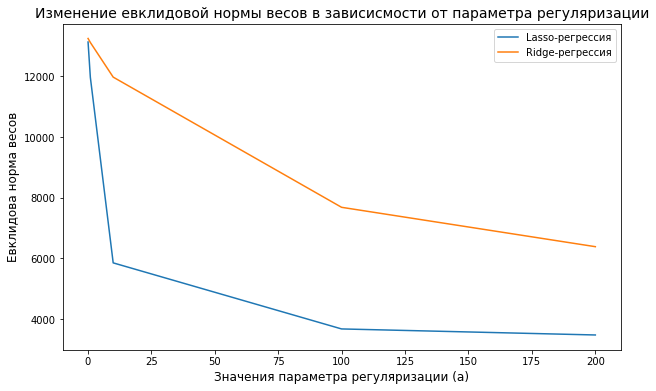

In [67]:
a=[0.1,1,10,100,200]
lasso_coefs=[] #сюда добавим значения евклидовой нормы весов для лассо
ridge_coefs=[]#сюда для ridge
for w in a: # пробегаемся по значениям а
  lasso=Lasso(w) #Лассо с параметром а
  lasso.fit(X_train_scaled, y_train) #обучаем
  lasso_coefs+=[np.linalg.norm(lasso.coef_)] #добавляем значение евклидовой нормы весов
  ridge = Ridge(w)
  ridge.fit(X_train_scaled, y_train)
  ridge_coefs+=[np.linalg.norm(ridge.coef_)] #то же самое проделываем для ridge

plt.figure(figsize=(10, 6))
plt.title(r'Изменение евклидовой нормы весов в зависисмости от параметра регуляризации', fontsize=14)
plt.plot (a, lasso_coefs, label = 'Lasso-регрессия')
plt.plot (a, ridge_coefs, label = 'Ridge-регрессия')
plt.xlabel('Значения параметра регуляризации (a)', fontsize=12)
plt.ylabel('Евклидова норма весов', fontsize=12)
plt.legend()
plt.show()
# Судя по графику, lasso-регрессия агрессивнее уменьшает веса, так как уже при параметре регуляризации примерно между 0 и 15 происходит резкий скачок вниз с
# 13000 до 6000, в то время как для ridge-регрессии скачок с того же самого значения происходит всего на 1000 вниз, то есть до 12000
# Lasso-регрессию часто используют для отбора признаков, так как она "вычисляет" корелированные переменные и зануляет их коэффициенты, чтобы они не мешали 
# модели нормально определять зависимость между признаком и целевой переменной. То есть по ней видно, какие признаки не являются важными для опеределения целевой переменной,
# из-за чего их можно удалить и оставить только самые эффективные признаки

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [73]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(alphas=[0.1,1,10,100,200],cv=5) # модуль кросс-валидации со значениями а
lassocv.fit(X_train_scaled, y_train) #обучаем
matrix=lassocv.mse_path_ #матрица ошибок
#Проверим, все ли нормально с матрицей ошибок (возьмем условие на размер матрицы из задания):
if matrix.shape[0]==len([0.1,1,10,100,200]) and matrix.shape[0]==5:
  print('Матрица ошибок построена верно')
alph=lassocv.alphas_
matrix_av=np.mean(matrix, axis=1) #усреднили ошибки
max_qual=np.argmin(matrix_av) #нашли минимальное значение ошибки (мин ошибка - макс качество)
best_alph=alph[max_qual]# нашли лучшую а, у которой минимальная ошибка
print('Значение параметра регуляризации, которое дает наибольшее качество:', best_alph)

Матрица ошибок построена верно
Значение параметра регуляризации, которое дает наибольшее качество: 0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [78]:
lasso_best=Lasso(alpha=best_alph)
lasso_best.fit(X_train_scaled, y_train) #обучаем
koefsss=lasso_best.coef_
koefsssdf=pd.DataFrame(koefsss)
koefsssdf.index=list(X_train_scaled.columns)
koefsssdf.columns=['Lasso_best-alpha_coefs']
koefsssdf
#carat - наиболее информативный признак, тк чем больше вес бриллианта, тем он дороже
#clarity тоже имеет очень большие веса, тк чистота бриллианта показывает наличие внутренних деффектов, указывает на редкость камня. Чем "чище" (меньше деффектов) бриллиант, тем 
# он дороже, поэтому эти признаки тоже имеют большой вес
#color имеет очень большой отрицательный вес, если он "плохой", те имеет значение J, то это уменьшает цену бриллианта
#самыми неинформативными признаками оказались y,z,depth и table. y и z ширина и глубина, не очень "полезные признаки" + они уже учтены при расчете depth (процент общей глубины),
# который тоже оказался не очень информативным. Вероятно, на цену больше влияет вес и качество камня, его редкость, а не размеры, поэтому эти признаки имеют наименьшие коэффиценты.
# table тоже относится к размерам (ширина вершины камня относительно самой широкой точки), поэтому как и предыдцщие признаки на цену не сильно влияет

,Lasso_best-alpha_coefs
carat,5322.111628
depth,-91.652246
table,-58.413946
x,-1120.171139
y,-1.111260
z,-22.571870
cut_Good,555.942471
cut_Ideal,810.423970
cut_Premium,738.238865
cut_Very Good,706.864419


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [80]:
y_predicted=lasso_best.predict(X_test_scaled) #Предсказание на тестовой
print(f"Среднеквадратичная ошибка на тестовой выборке: {mean_squared_error(y_test, y_predicted)}")
# ошибка обычной линейной регрессии была равна 1311549.0834539912, что оказалось меньше, чем ошибка в Lasso-регрессии
# Судя по ошибке,лучше использовать обычную линейную регрессию для предсказаний (тк доля верных ответов у нее будет больше)
# Обычная модель линейной регрессии могла оказаться лучше модели lasso-регрессии, так как в данных скорее всего было немного признаков, которые сильно коррелированы
# И лассо-регрессия очень снизила (почти до 0) эти коэффициенты, хотя они могли быть важны для опеределения целевой переменной. При линейной регрессии таких штрафов за большие
# коэффициенты не было, поэтому прогнозы цены бриллианта могли оказаться точнее

Среднеквадратичная ошибка на тестовой выборке: 1311879.3110391723
